In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize']=19,9
import seaborn as sns

In [408]:
df=pd.read_csv("/kaggle/input/playground-series-s3e12/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s3e12/test.csv")

In [409]:
df

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [410]:
df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

<AxesSubplot:>

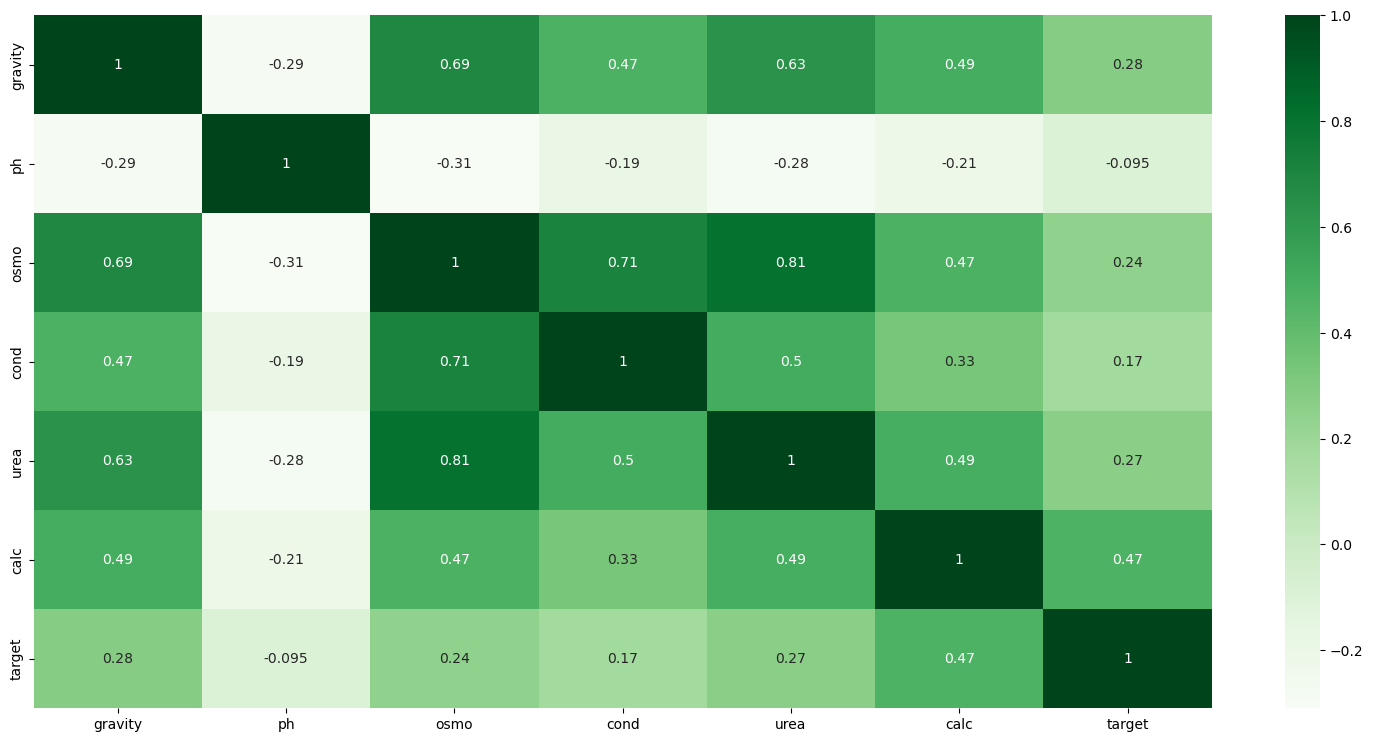

In [411]:
sns.heatmap(df.drop(columns='id').corr(),annot=True,cmap="Greens")

In [412]:
df.set_index('id',inplace=True)

In [413]:
df

,gravity,ph,osmo,cond,urea,calc,target
id,,,,,,,
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0
410,1.024,5.53,577,19.7,224,0.77,0
411,1.018,6.28,455,22.2,270,7.68,1


In [414]:
x=df.iloc[:,0:-1]

In [415]:
x

,gravity,ph,osmo,cond,urea,calc
id,,,,,,
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21
...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53
410,1.024,5.53,577,19.7,224,0.77
411,1.018,6.28,455,22.2,270,7.68


In [416]:
y=df.iloc[:,-1]

In [417]:
y

id
0      0
1      0
2      0
3      1
4      1
      ..
409    0
410    0
411    1
412    1
413    0
Name: target, Length: 414, dtype: int64

<AxesSubplot:>

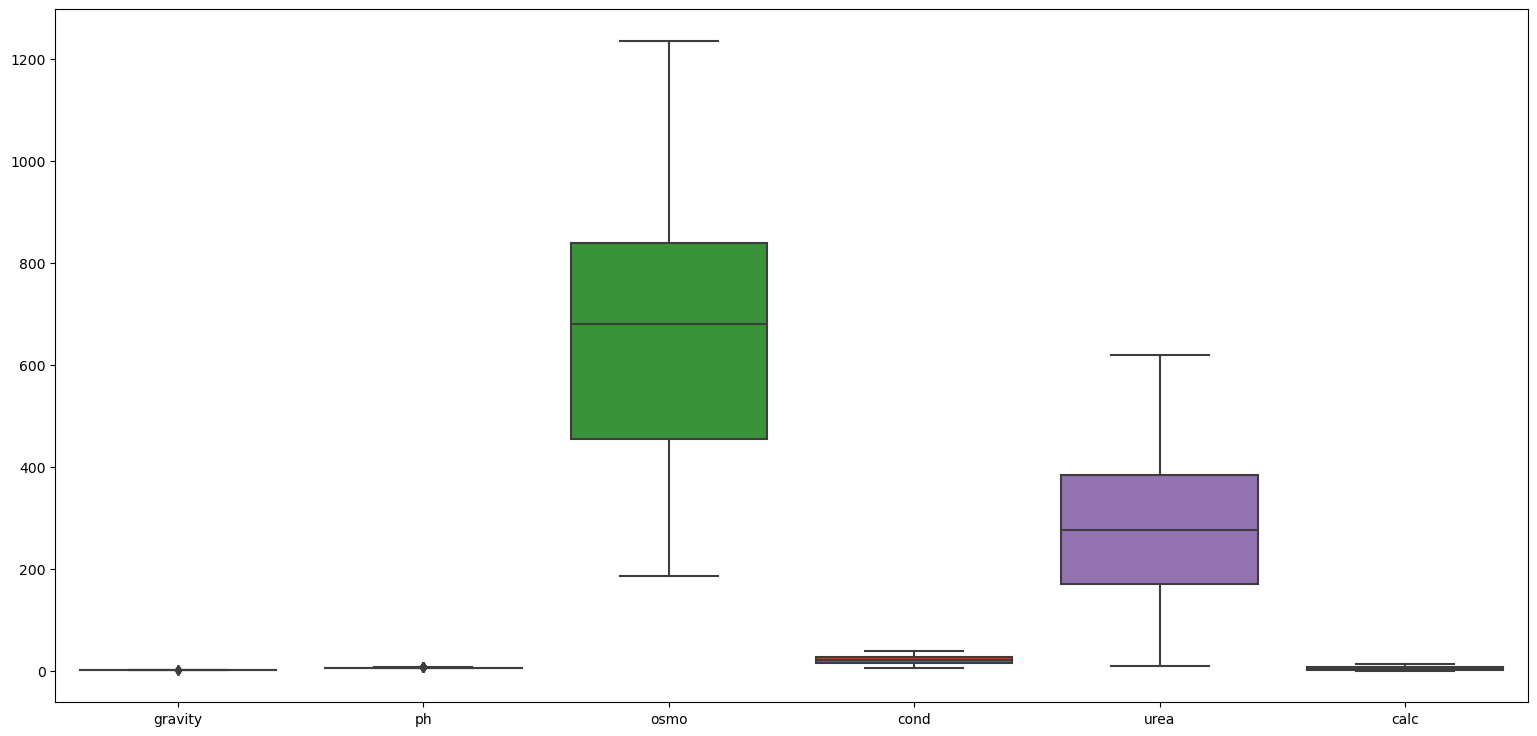

In [418]:
sns.boxplot(x)

****data do not have any outliers

In [419]:
y.value_counts()

0    230
1    184
Name: target, dtype: int64

data is balanced

In [420]:
test

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31
272,686,1.012,5.62,410,14.0,195,1.45
273,687,1.031,5.68,874,29.0,380,4.49
274,688,1.019,5.47,543,21.4,170,1.64


In [421]:
test.set_index('id',inplace=True)

In [422]:
test

,gravity,ph,osmo,cond,urea,calc
id,,,,,,
414,1.017,5.24,345,11.5,152,1.16
415,1.020,5.68,874,29.0,385,3.46
416,1.024,5.36,698,19.5,354,13.00
417,1.020,5.33,668,25.3,252,3.46
418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...
685,1.029,6.27,853,21.4,364,7.31
686,1.012,5.62,410,14.0,195,1.45
687,1.031,5.68,874,29.0,380,4.49


# ****Lets Split The Data

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [425]:
x_train.shape

(289, 6)

In [426]:
x_train

,gravity,ph,osmo,cond,urea,calc
id,,,,,,
7,1.015,5.53,450,8.1,170,1.16
194,1.012,4.81,567,21.4,214,1.27
19,1.026,5.66,1032,29.1,430,8.94
176,1.024,5.40,853,29.5,360,7.82
367,1.009,7.20,386,14.9,104,1.93
...,...,...,...,...,...,...
71,1.028,6.28,970,35.9,382,4.49
106,1.019,6.13,594,27.6,418,1.49
270,1.015,5.35,559,8.1,301,3.98


In [427]:
y_train.shape

(289,)

In [428]:
x_test.shape

(125, 6)

In [429]:
y_test.shape

(125,)

# Lets do Logistic Regression

In [430]:
from sklearn.linear_model import LogisticRegression

In [431]:
lr=LogisticRegression()

In [432]:
lr.fit(x_train,y_train)

LogisticRegression()

In [433]:
pred=lr.predict(x_test)

In [434]:
pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [435]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [436]:
accuracy_score_logistic=accuracy_score(y_test,pred)

In [437]:
accuracy_score_logistic

0.76

# So 76% Accuracy by doing Logistic Regression

# Lets do SVM

In [438]:
from sklearn.svm import SVC

In [439]:
svm=SVC()

In [440]:
svm.fit(x_train,y_train)

SVC()

In [441]:
pred_svm=svm.predict(x_test)

In [442]:
pred_svm

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [443]:
accuracy_score_svm=accuracy_score(y_test,pred_svm)

In [444]:
accuracy_score_svm

0.624

# 62.4% by doing SVM

# Lets do Decission Tree

In [445]:
from sklearn.tree import DecisionTreeClassifier

In [446]:
dtree=DecisionTreeClassifier()

In [447]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [448]:
predict_dtree=dtree.predict(x_test)

In [449]:
predict_dtree

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1])

In [450]:
accuracy_score_dtree=accuracy_score(y_test,predict_dtree)

In [451]:
accuracy_score_dtree

0.624

# 61.6% Accuracy by doing Decission Tree

# Lets do Random Forest Classifier

In [452]:
from sklearn.ensemble import RandomForestClassifier

In [453]:
rfc=RandomForestClassifier(n_estimators=100,criterion='gini')

In [454]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [455]:
predict_rfc=rfc.predict(x_test)

In [456]:
predict_rfc

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [457]:
accuracy_score_rfc=accuracy_score(y_test,predict_rfc)

In [458]:
accuracy_score_rfc

0.72

# 72.8% by doing Random Forest Classifier

# Lets do adaboost

In [459]:
from sklearn.ensemble import AdaBoostClassifier

In [460]:
ada=AdaBoostClassifier()

In [461]:
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [462]:
pred_ada=ada.predict(x_test)

In [463]:
pred_ada

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [464]:
accuracy_score_ada=accuracy_score(y_test,pred_ada)

In [465]:
accuracy_score_ada

0.768

# 76.8% by doing ADABoost

# Lets do Catboost

In [466]:
from catboost import CatBoostClassifier

In [467]:
cat=CatBoostClassifier()

In [468]:
cat.fit(x_train,y_train)

Learning rate set to 0.006064
0:	learn: 0.6912519	total: 1.41ms	remaining: 1.41s
1:	learn: 0.6891252	total: 2.47ms	remaining: 1.23s
2:	learn: 0.6872639	total: 3.5ms	remaining: 1.16s
3:	learn: 0.6850951	total: 4.4ms	remaining: 1.09s
4:	learn: 0.6826948	total: 5.38ms	remaining: 1.07s
5:	learn: 0.6807502	total: 6.32ms	remaining: 1.05s
6:	learn: 0.6788716	total: 7.24ms	remaining: 1.03s
7:	learn: 0.6768196	total: 8.21ms	remaining: 1.02s
8:	learn: 0.6744211	total: 9.19ms	remaining: 1.01s
9:	learn: 0.6723812	total: 10.2ms	remaining: 1s
10:	learn: 0.6701674	total: 11.2ms	remaining: 1.01s
11:	learn: 0.6683471	total: 12.2ms	remaining: 1s
12:	learn: 0.6664217	total: 13.2ms	remaining: 1s
13:	learn: 0.6648913	total: 14.1ms	remaining: 995ms
14:	learn: 0.6628822	total: 15.1ms	remaining: 992ms
15:	learn: 0.6606112	total: 16.1ms	remaining: 993ms
16:	learn: 0.6589154	total: 17.1ms	remaining: 990ms
17:	learn: 0.6570568	total: 18.2ms	remaining: 992ms
18:	learn: 0.6552367	total: 19.1ms	remaining: 988ms
19:

In [469]:
pred_cat=cat.predict(x_test)

In [470]:
pred_cat

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [471]:
accuracy_score_cat=accuracy_score(y_test,pred_cat)

In [472]:
accuracy_score_cat

0.76

# 76% by doing CATBoost

# Lets do XGBoost

In [473]:
from xgboost import XGBRFClassifier

In [474]:
xgc=XGBRFClassifier()

In [475]:
xgc.fit(x_train,y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=0,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)

In [476]:
pred_xgc=xgc.predict(x_test)

In [477]:
pred_xgc

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [478]:
accuracy_score_xgboost=accuracy_score(y_test,pred_xgc)

In [479]:
accuracy_score_xgboost

0.736

# 73.6% by doing XGBoost Classifier

# Lets Check which Model gave better score

In [480]:
print("Accuracy Score of Logistic Regression Model= ",accuracy_score_logistic)
print("Accuracy Score of SVM Model= ",accuracy_score_svm)
print("Accuracy Score of Decission Tree Model= ",accuracy_score_dtree)
print("Accuracy Score of Random Forest Classifier Model= ",accuracy_score_rfc)
print("Accuracy Score of ADABoost Model= ",accuracy_score_ada)
print("Accuracy Score of CatBoost Model= ",accuracy_score_cat)
print("Accuracy Score of XGBoost Model= ",accuracy_score_xgboost)

Accuracy Score of Logistic Regression Model=  0.76
Accuracy Score of SVM Model=  0.624
Accuracy Score of Decission Tree Model=  0.624
Accuracy Score of Random Forest Classifier Model=  0.72
Accuracy Score of ADABoost Model=  0.768
Accuracy Score of CatBoost Model=  0.76
Accuracy Score of XGBoost Model=  0.736


# Here ADABoost is performing High with 76.8% of Accuracy

# Lets Predict

In [481]:
test

,gravity,ph,osmo,cond,urea,calc
id,,,,,,
414,1.017,5.24,345,11.5,152,1.16
415,1.020,5.68,874,29.0,385,3.46
416,1.024,5.36,698,19.5,354,13.00
417,1.020,5.33,668,25.3,252,3.46
418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...
685,1.029,6.27,853,21.4,364,7.31
686,1.012,5.62,410,14.0,195,1.45
687,1.031,5.68,874,29.0,380,4.49


In [482]:
predicted_Value=ada.predict(test)

In [483]:
predicted_Value

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [486]:
test.reset_index('id',inplace=True)

In [487]:
test

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36
...,...,...,...,...,...,...,...
271,685,1.029,6.27,853,21.4,364,7.31
272,686,1.012,5.62,410,14.0,195,1.45
273,687,1.031,5.68,874,29.0,380,4.49
274,688,1.019,5.47,543,21.4,170,1.64


In [488]:
predicted_Value=pd.DataFrame({'id': test['id'],'predicted_Value': predicted_Value})

In [489]:
predicted_Value

,id,predicted_Value
0,414,0
1,415,0
2,416,1
3,417,0
4,418,0
...,...,...
271,685,1
272,686,0
273,687,0
274,688,0


In [491]:
predicted_Value.to_csv('submission.csv',index=False)